In [15]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

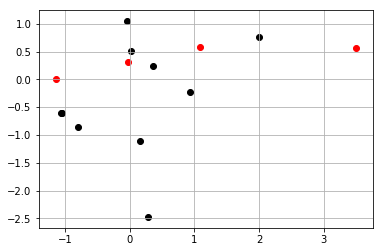

In [51]:
# Genera datos aleatorios en 2D: 10 puntos, 4 centros
X = numpy.random.randn(10,2)
C = numpy.random.randn(4,2)

plt.scatter(X[:,0], X[:,1], color='black');
plt.scatter(C[:,0], C[:,1], color='red');
plt.grid(True)

In [61]:
# Calcula distancias cuadradas de todos los datos de X a cada dato de C
def distancia_cuadrada(X,C):
  """Calcula cuadrados de las distancias de cada punto en X a cada punto en C."""
  # Obtiene dimensiones de las matrices
  (Xr, Xc) = X.shape
  (Cr, Cc) = C.shape
  # Calcula distancias cuadradas
  d2 = numpy.outer(numpy.sum(numpy.square(X), axis=1), numpy.ones((Cr, 1))) + \
       numpy.outer(numpy.ones((Xr, 1)),numpy.sum(numpy.square(C), axis=1)) - \
       2*numpy.dot(X, C.transpose())
  # Evita distancias cuadradas negeativas por redondeo
  d2[d2 < 0] = 0
  return d2

def dist_eucl2(X,C):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.transpose(D,(0,2,1))
    D  = np.square(D).sum(axis=-1)
    return np.argsort(D,axis=1).copy()

def dist_eucl_pw(X,C,p):
    D  = X[:,:,np.newaxis] - np.transpose( C[np.newaxis],(0,2,1) )
    D  = np.transpose(D,(0,2,1))
    D  = np.power(D,p).sum(axis=-1)
    return np.argsort(D,axis=1).copy()

def encuentra_vecino_mas_cercano(X, C):
  """Encuentra entre los puntos de C el más cercano a cada punto de X."""
  # Calcula distancias cuadradas
  d2 = distancia_cuadrada(X, C)
  # Encuentra los vecinos mas cercanos
  nn = numpy.argsort(d2, axis=1)  
  return nn[:,0]

[1 0 0 1 0 0 3 1 0 3]
[1 0 0 1 0 0 3 1 0 3]
[1 0 0 1 0 0 3 1 0 3]


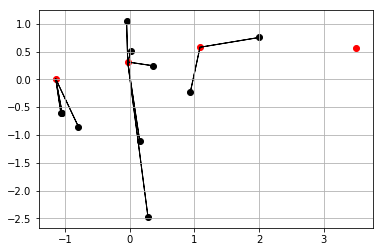

In [56]:
# Encuentra vecinos de X en C
nn  = encuentra_vecino_mas_cercano(X,C)
nna = dist_eucl2  (X,C  )[:,0]
nnb = dist_eucl_pw(X,C,2.)[:,0]
print (nn )
print (nna)
print (nnb)
# Grafica datos y muestra parejas de vecinos
plt.scatter(X[:,0], X[:,1], color='black');
plt.scatter(C[:,0], C[:,1], color='red');
plt.grid(True)
for i in range(X.shape[0]):
  plt.arrow(X[i,0],X[i,1],C[nn[i],0]-X[i,0],C[nn[i],1]-X[i,1]);


In [66]:
X = numpy.random.randn(1000,100)

#dX = encuentra_vecino_mas_cercano(X, X)
#dX = dist_eucl2  (X,X)
dX = dist_eucl_pw(X,X,2)

In [25]:
dX.shape

(1000, 1000)

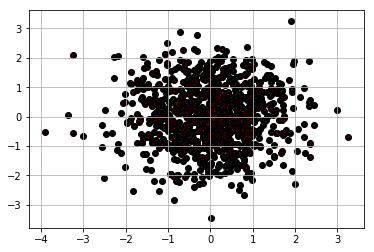

In [27]:
# Encuentra las distancias cuadradas de todos los datos de X contra todos ellos
#dX = distancia_cuadrada(X,X)
# Encuentra el vecino más cercano de cada punto de entre los puntos de X
# Ojo: no puede usarse nuestra función porque cada dasto es el más cercano a si mismo
#inx = numpy.argsort(dX, axis=1)[:,1]
inx = dX[:,0]
# Grafica datos y conecta los vecinos mas cercanos
plt.scatter(X[:,0], X[:,1], color='black');
plt.grid(True)
for i in range(X.shape[0]):
  plt.arrow(X[i,0],X[i,1],X[inx[i],0]-X[i,0],X[inx[i],1]-X[i,1],color='red');